In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ensure inline plotting for the Jupyter notebooks
%matplotlib inline


In [2]:
# Create a tensor of 200 values ranging from -1 to 1.
X = torch.linspace(-1, 1, 200).view(-1, 1)


In [4]:
# Compute y based on the sine function.
y=(np.sin(5*(np.pi*X)))/((5*(np.pi*X)))
y = torch.where(X == 0, torch.tensor(1.0), torch.sin(5 * np.pi * X) / (5 * np.pi * X))

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, inp=1, h2=5, h3=10, h4=10, h5=10, h6=10, h7=10, h8=5, outp=1):
        super(Model, self).__init__()
        # Define the fully connected layers.
        self.fc1 = nn.Linear(inp, h2)
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, outp)

    def forward(self, x):
        #  ReLU activation. 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        # Output layer.
        x = self.out(x)
        return x


In [7]:
model1 = Model()

In [9]:
CriterionLoss = nn.MSELoss()

In [11]:
optim = torch.optim.Adam(model1.parameters(), lr=0.001)

In [12]:
epochs = 2000
losses = []
grad_norm_list = []

for epoch in range(epochs):
    y_pred = model1(X)
    loss = CriterionLoss(y_pred, y)
    losses.append(loss.item())
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    grad_total = 0.0
    for param in model1.parameters():
        if param.grad is not None:
            grad = (param.grad.cpu().data.numpy() ** 2).sum()
            grad_total += grad
    grad_norm = grad_total ** 0.5
    grad_norm_list.append(grad_norm)


In [13]:
losses=torch.tensor(losses)

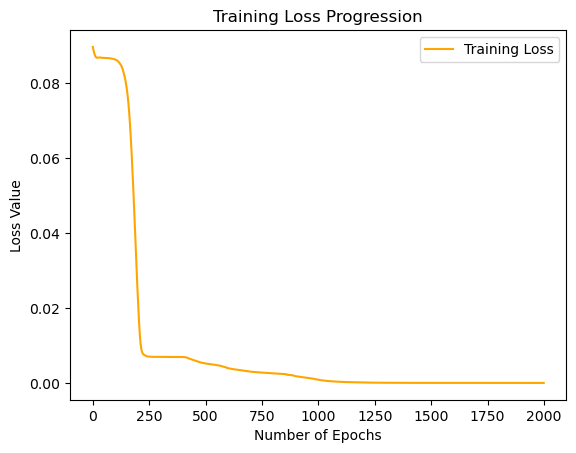

In [15]:
import matplotlib.pyplot as plt

# Plot the training loss across epoch.
plt.plot(range(epochs), np.array(losses), 'Orange', label='Training Loss')  # Blue line
plt.title("Training Loss Progression")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Value")
plt.legend(loc="upper right")
plt.show()


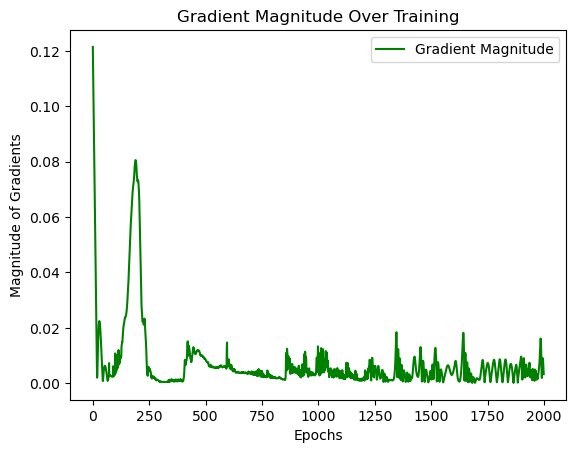

In [16]:

# Plot the gradient magnitude over iterations
plt.plot(range(epochs), grad_norm_list, 'g', label='Gradient Magnitude')  # Green line
plt.title("Gradient Magnitude Over Training")
plt.xlabel("Epochs")
plt.ylabel("Magnitude of Gradients")
plt.legend(loc="upper right")
plt.show()
